# Tracking script

### Will be great to be it at a class
### Need to try it with real cells

In [1]:
%matplotlib inline

In [2]:
from tracking import *
from flatten_images import *
from plot_track import *
from analysis_track import *
from skimage import io
from IPython.html.widgets import interact, fixed, IntSlider

In [3]:
img = io.imread("SwimmingAlgae.tif")

In [4]:
nt, ny, nx = img.shape

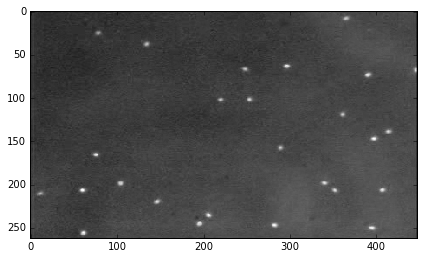

In [5]:
@interact(image = fixed(img), x=(0, nt-1, 1))
def show_frame(image, x=5):
    io.imshow(image[x,:,:])

In [6]:
img_divide = illumin_correct(img)

<function flatten_images.plot_profile_corrected_image>

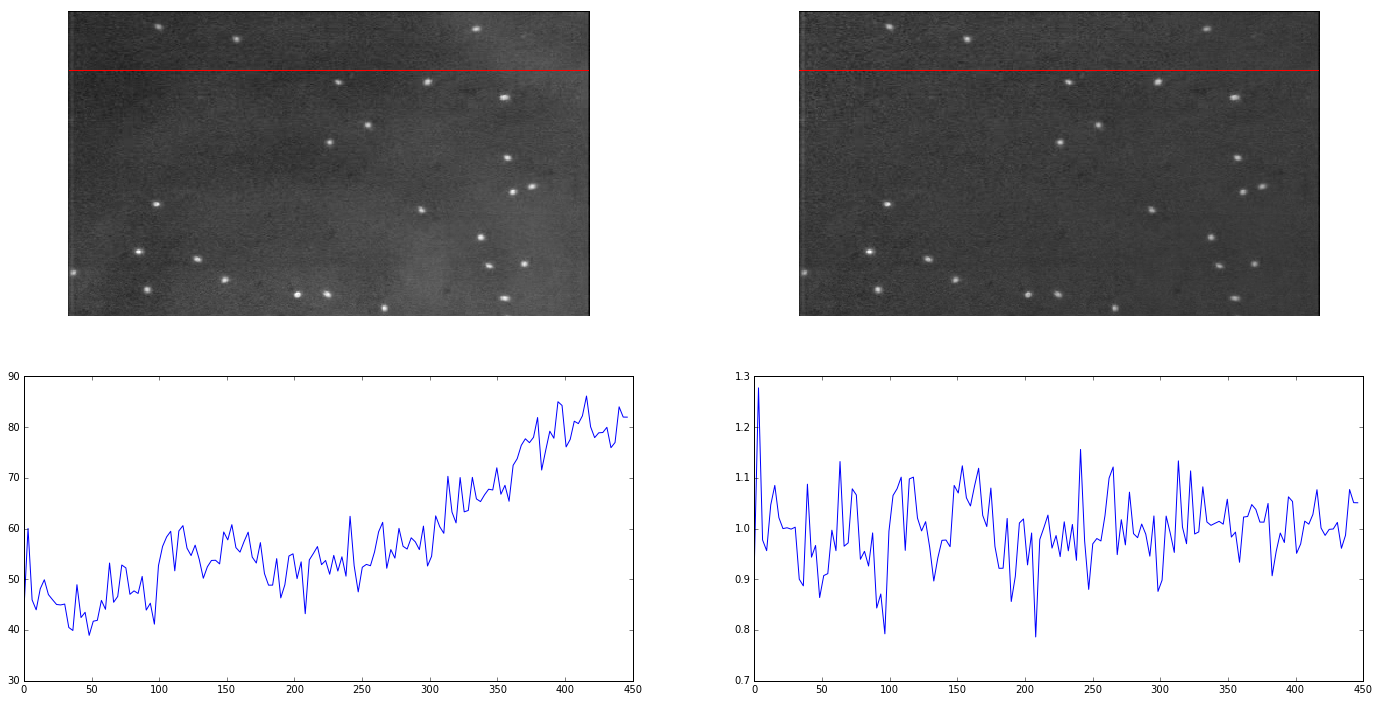

In [7]:
interact(plot_profile_corrected_image, img = fixed(img), img_divide = fixed(img_divide), 
         position = IntSlider(min=0,max=ny,step=1,value=50), 
         div = IntSlider(min=0,max=5,step=1,value=3))

In [8]:
local_maxima = Num_Blob(img_divide, nt)

In [9]:
liste_a = multiple_track_all(local_maxima, img)

## Plot

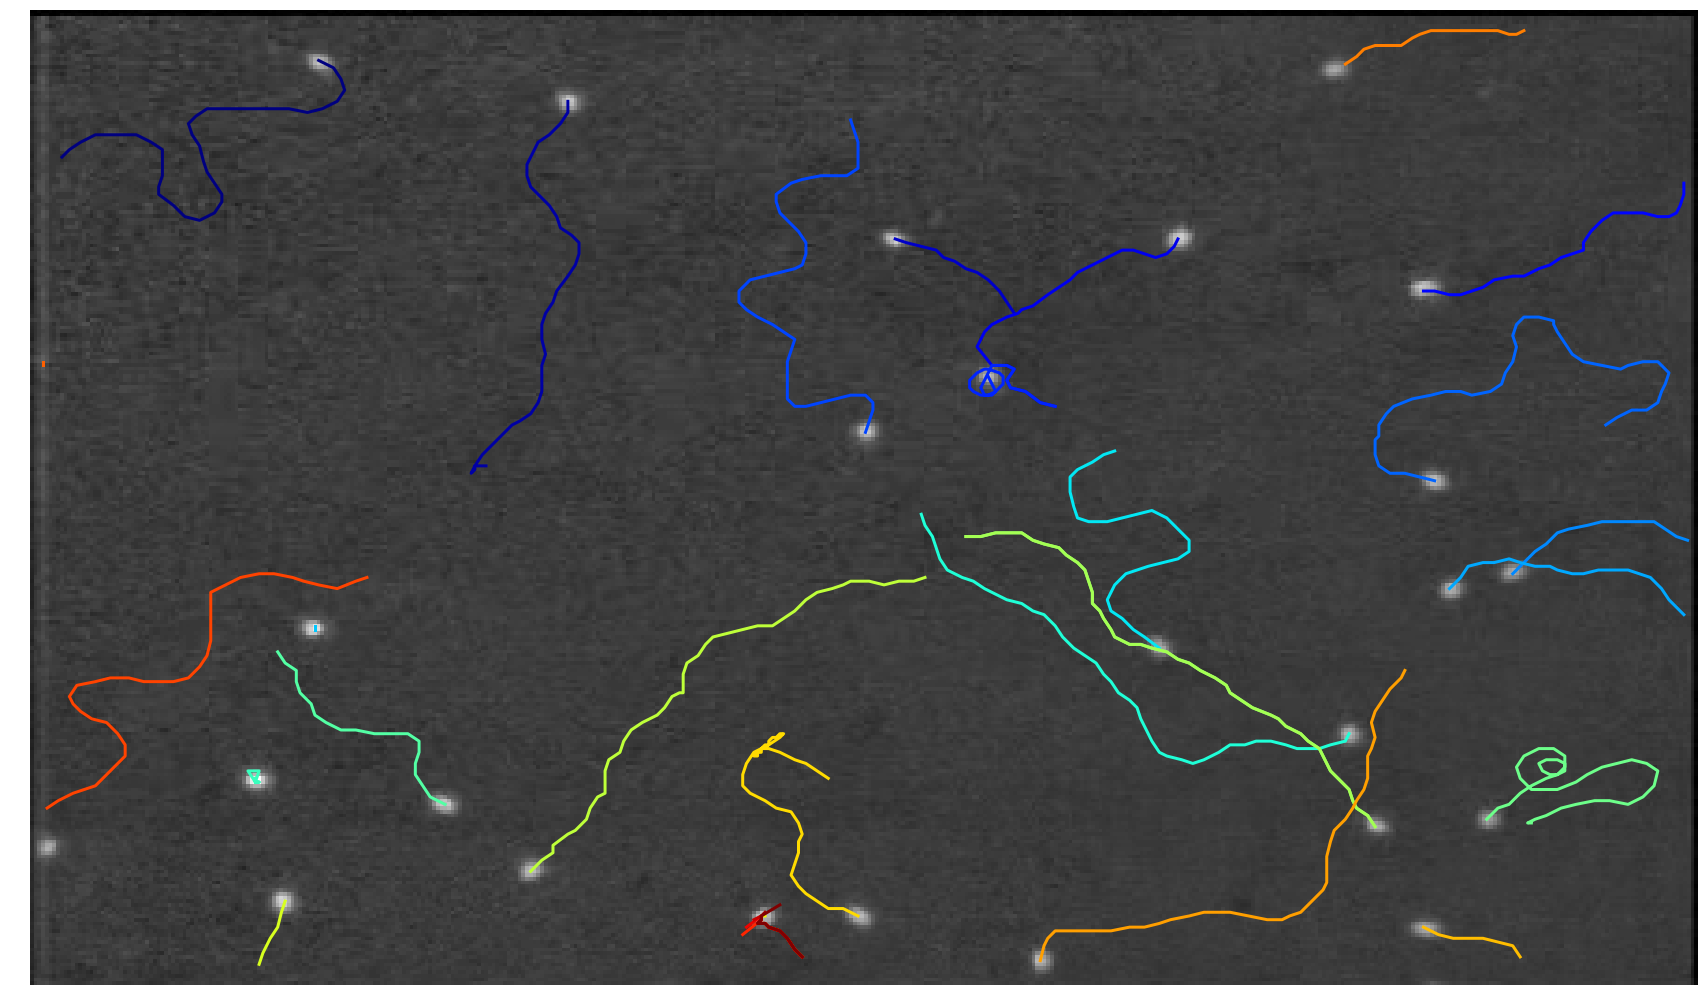

In [10]:
plot_track(img_divide, liste_a)

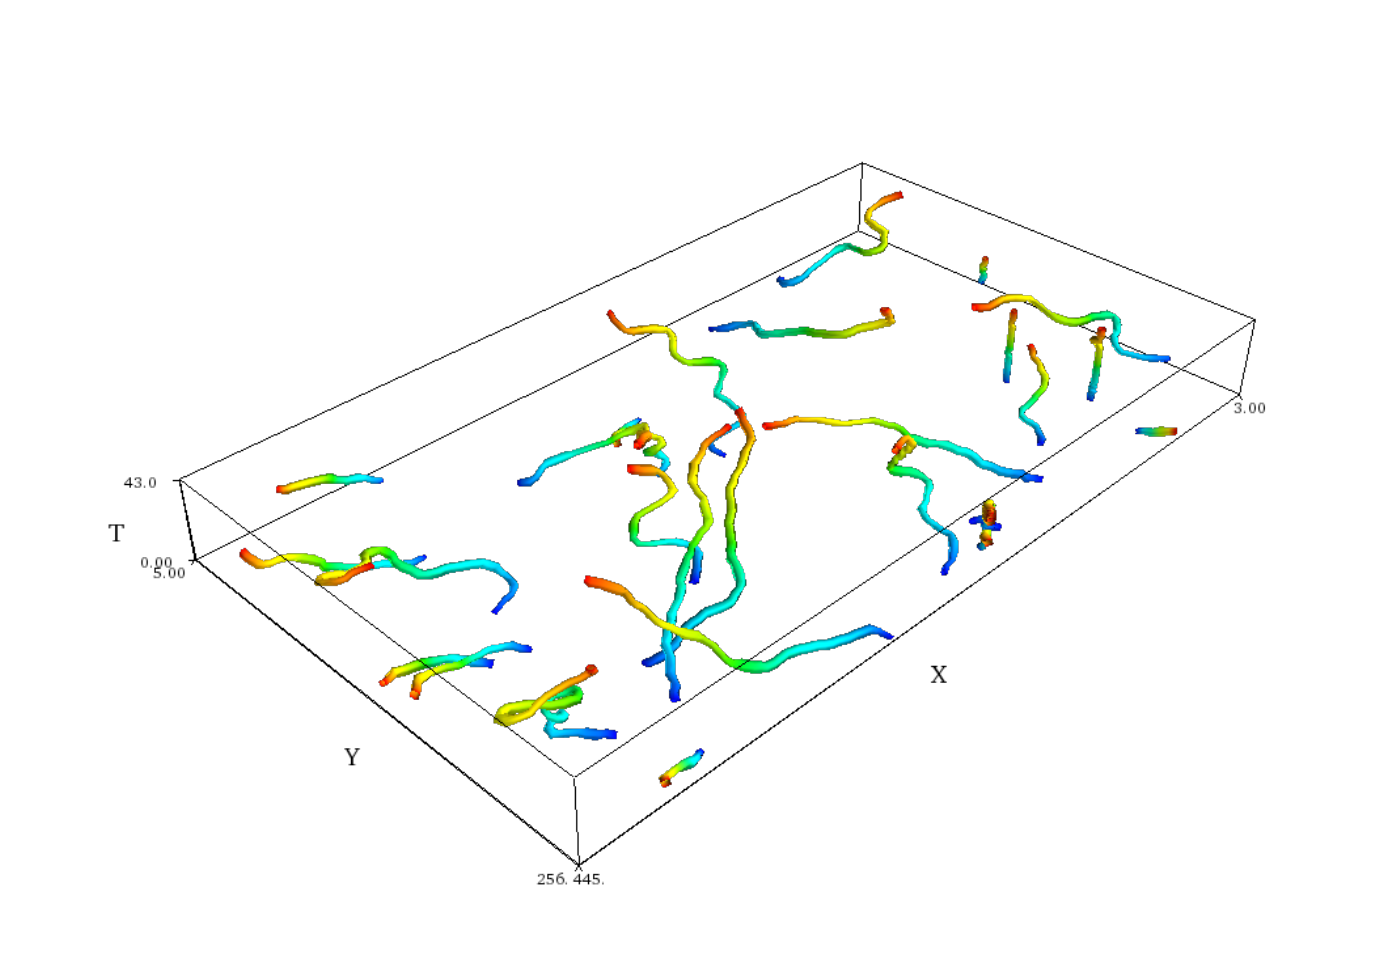

In [11]:
plot_track_3d(liste_a)

In [12]:
trajectories = create_dataframe(local_maxima, liste_a)

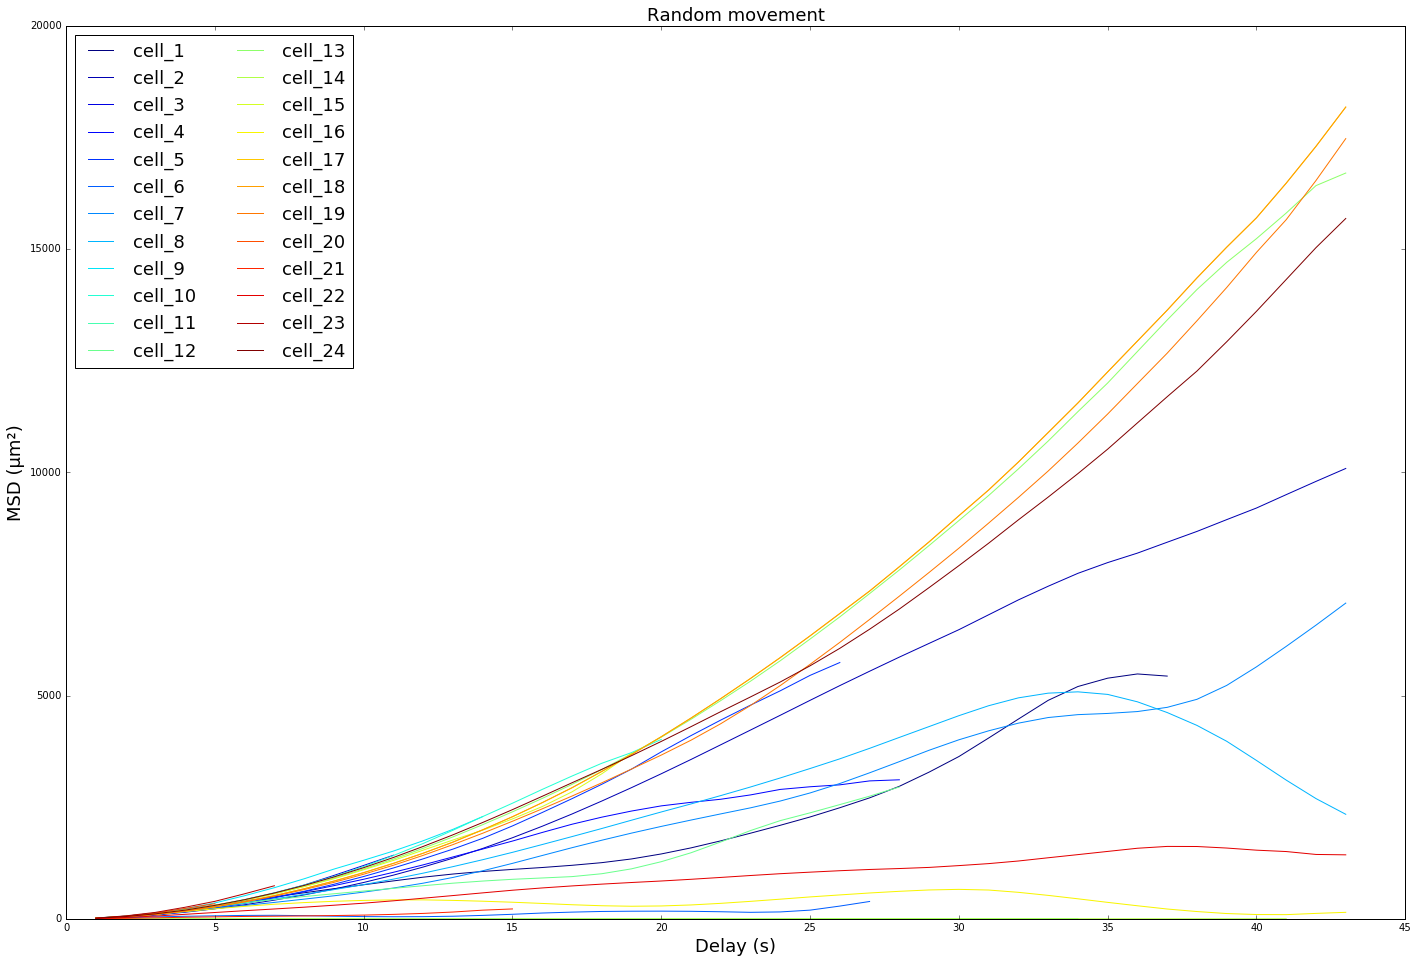

In [13]:
plot_MSD(trajectories)